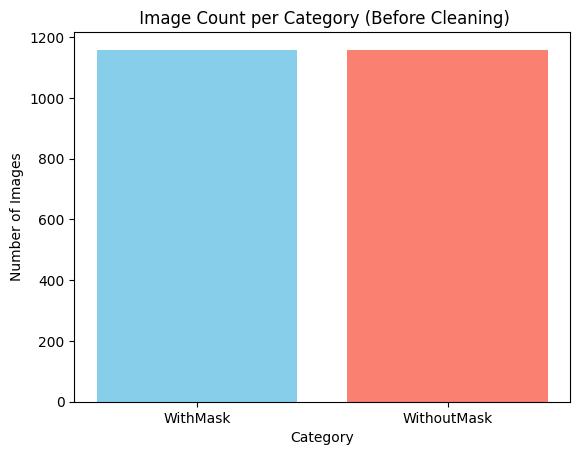

🔹 Total images before cleaning: 2318
{'WithMask': 1159, 'WithoutMask': 1159}


Checking WithoutMask: 100%|██████████| 1159/1159 [00:11<00:00, 99.72it/s] 


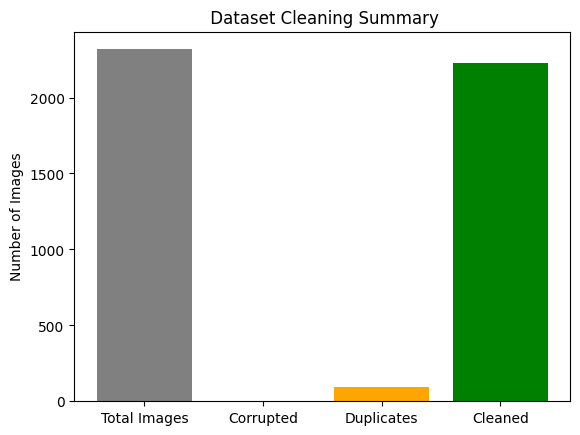

🔹 Cleaning Summary: {'Total Images': 2318, 'Corrupted': 0, 'Duplicates': 91, 'Cleaned': 2227}


In [1]:
# import libraries 
import os
import cv2
import hashlib
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import zipfile

# Define dataset paths
dataset_path = "/kaggle/input/face-mask-dataset/dataset"
categories = ["WithMask", "WithoutMask"]

cleaned_path = "/kaggle/working/CleanedDataset"
os.makedirs(cleaned_path, exist_ok=True)

# Count images before cleaning
category_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'salmon'])
plt.title(" Image Count per Category (Before Cleaning)")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

print("🔹 Total images before cleaning:", sum(category_counts.values()))
print(category_counts)

# Cleaning process
total_images = 0
corrupted_images = 0
duplicate_images = 0
hash_set = set()

for category in categories:
    src_folder = os.path.join(dataset_path, category)
    dst_folder = os.path.join(cleaned_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in tqdm(os.listdir(src_folder), desc=f"Checking {category}"):
        file_path = os.path.join(src_folder, file)
        total_images += 1

        # Check image corrupted 
        try:
            img = cv2.imread(file_path)
            if img is None:
                corrupted_images += 1
                continue
        except:
            corrupted_images += 1
            continue

        # Check for duplicates
        with open(file_path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()

        if file_hash in hash_set:
            duplicate_images += 1
            continue
        else:
            hash_set.add(file_hash)

        # Save cleaned images
        shutil.copy(file_path, dst_folder)

# Final stats
cleaned_total = total_images - corrupted_images - duplicate_images



summary = {
    "Total Images": total_images,
    "Corrupted": corrupted_images,
    "Duplicates": duplicate_images,
    "Cleaned": cleaned_total
}

# Plot cleaning summary
plt.bar(summary.keys(), summary.values(), color=['gray', 'red', 'orange', 'green'])
plt.title(" Dataset Cleaning Summary")
plt.ylabel("Number of Images")
plt.show()

print("🔹 Cleaning Summary:", summary)


In [2]:
zip_path = "/kaggle/working/CleanedDataset.zip"

# Creates a new zip archive for writing
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(cleaned_path):
        for file in files:
            abs_path = os.path.join(root, file)  # full path of file
            rel_path = os.path.relpath(abs_path, cleaned_path) # relative path (to keep folder structure)
            zipf.write(abs_path, rel_path)

print(f"\n Cleaned dataset saved and zipped at: {zip_path}")


 Cleaned dataset saved and zipped at: /kaggle/working/CleanedDataset.zip
